In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the KDD99 dataset
kdd_column_names = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = kdd_column_names.iloc[:,0].values
kdd = pd.read_csv('datasets/kddcup.data_10_percent_corrected', names=kdd_names)

# Data Clean-up

In [3]:
# Copy kdd data to new dataset to perform data pre-processing methods
kdd_copy = kdd.copy()
kdd_copy.to_csv('kdd_copy_multi.csv')

In [4]:
# Find missing values
missing_values_count = (kdd_copy.isnull().sum()) # Check for missing values
print("Number of missing values within each column:")
print(missing_values_count)

Number of missing values within each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  

In [5]:
# Drop duplicate values
kdd_copy.drop_duplicates(keep='first', inplace = True)

In [6]:
# Count unique values and delete columns that have only 1 unique value
n = kdd.nunique(axis=0)
print('Count of all unique values of each column:')
print(n)

Count of all unique values of each column:
duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                 

In [7]:
kdd_copy.drop(columns=['num_outbound_cmds', 'is_host_login'],inplace=True)

In [8]:
print('\nCount of all unique values of each column after removing redundant features:')
print(kdd_copy.nunique(axis=0))


Count of all unique values of each column after removing redundant features:
duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       

In [9]:
kdd_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


# Exploratory Data Analysis - EDA

In [10]:
kdd_copy.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
kdd_copy['attack_type'] = kdd_copy['attack_type'].str.replace('normal.', 'normal')
kdd_copy.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [12]:
# General information of each Column
kdd_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int64  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int64  
 5   dst_bytes                    145586 non-null  int64  
 6   land                         145586 non-null  int64  
 7   wrong_fragment               145586 non-null  int64  
 8   urgent                       145586 non-null  int64  
 9   hot                          145586 non-null  int64  
 10  num_failed_logins            145586 non-null  int64  
 11  logged_in                    145586 non-null  int64  
 12  num_compromised              145586 non-null  int64  
 13 

In [13]:
# Get the names of all columns
kdd_copy.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [14]:
# Statistics
kdd_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,145586.0,132.025181,1.224157e+03,0.0,0.00,0.00,0.00,58329.0
src_bytes,145586.0,7995.699628,1.820383e+06,0.0,0.00,147.00,288.00,693375640.0
dst_bytes,145586.0,2859.780020,6.080979e+04,0.0,0.00,105.00,1164.75,5155468.0
land,145586.0,0.000137,1.171998e-02,0.0,0.00,0.00,0.00,1.0
wrong_fragment,145586.0,0.020201,2.393680e-01,0.0,0.00,0.00,0.00,3.0
urgent,145586.0,0.000048,1.015038e-02,0.0,0.00,0.00,0.00,3.0
hot,145586.0,0.100174,1.426798e+00,0.0,0.00,0.00,0.00,30.0
num_failed_logins,145586.0,0.000515,2.858542e-02,0.0,0.00,0.00,0.00,5.0
logged_in,145586.0,0.491490,4.999293e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,145586.0,0.026177,3.311373e+00,0.0,0.00,0.00,0.00,884.0


## Data Visualization

In [15]:
# Count occurence of each attack type
kdd_copy['attack_type'].value_counts()

normal              87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack_type, dtype: int64

Text(0.5, 1.0, 'Data Distribution')

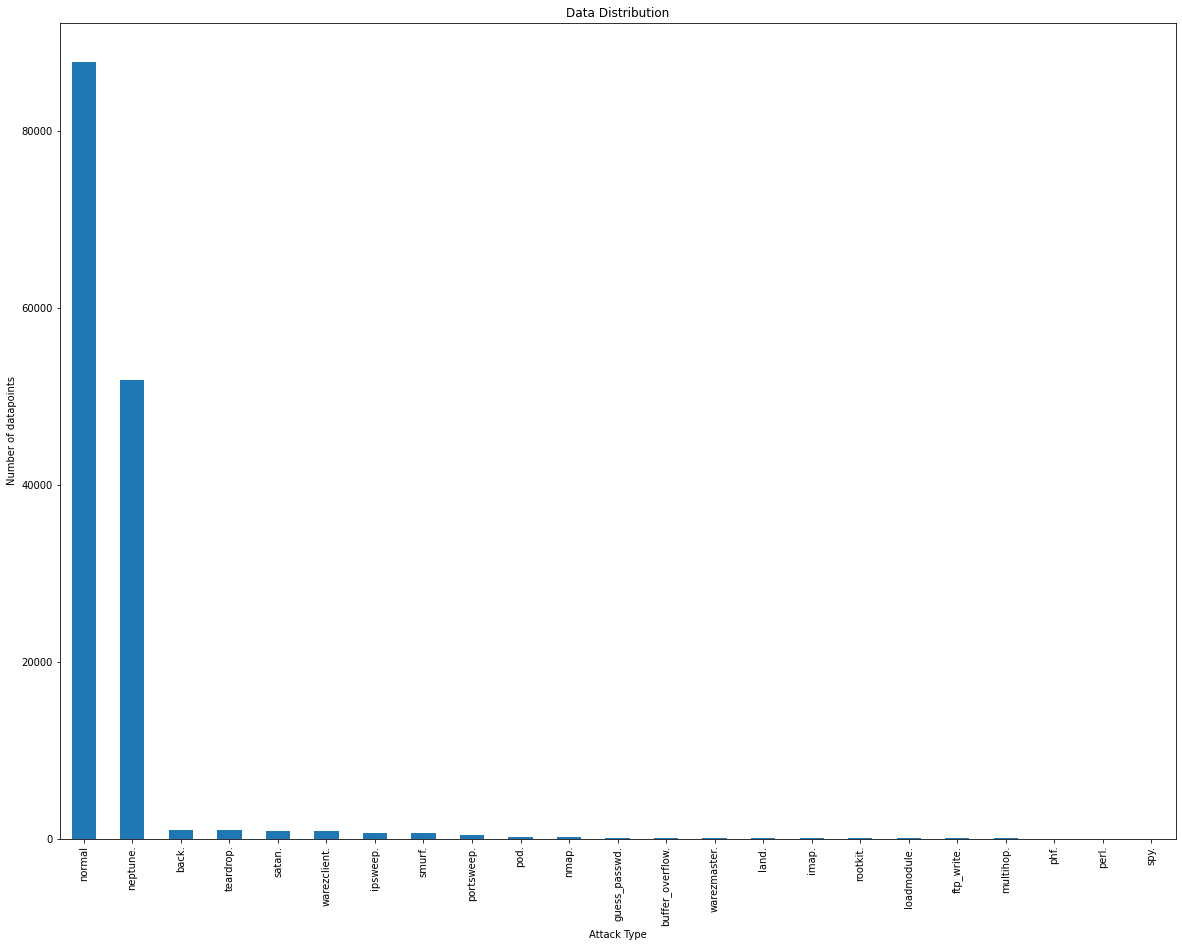

In [16]:
# Plot Datapoint Distributions according to 'attack_type'
plt.figure(figsize=(20,15))
attack_type_distribution = kdd_copy['attack_type'].value_counts()
attack_type_distribution.plot(kind='bar')
plt.xlabel('Attack Type')
plt.ylabel('Number of datapoints')
plt.title('Data Distribution')

In [17]:
# Attack type versus Protocol type
attack_protocol_mapping = pd.crosstab(kdd.attack_type,kdd.protocol_type)
attack_protocol_mapping

protocol_type,icmp,tcp,udp
attack_type,,,
back.,0,2203,0
buffer_overflow.,0,30,0
ftp_write.,0,8,0
guess_passwd.,0,53,0
imap.,0,12,0
ipsweep.,1153,94,0
land.,0,21,0
loadmodule.,0,9,0
multihop.,0,7,0


In [18]:
# Convert each column to series
udp_attack_types =attack_protocol_mapping.udp
icmp_attack_types = attack_protocol_mapping.icmp
tcp_attack_types = attack_protocol_mapping.tcp
tcp_attack_types

attack_type
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.                94
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  103
normal.              76813
perl.                    3
phf.                     4
pod.                     0
portsweep.            1039
rootkit.                 7
satan.                1416
smurf.                   0
spy.                     2
teardrop.                0
warezclient.          1020
warezmaster.            20
Name: tcp, dtype: int64

In [20]:
# Attack class function to convert 'attack_type' to 'attack_class'
def attack_class(kdd_dataset):
  kdd_dataset.attack_type.replace(['back.', 'neptune.', 'land.', 'pod.', 'smurf.', 'teardrop.'],'Dos',inplace=True)
  kdd_dataset.attack_type.replace(['ftp_write.','guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)
  kdd_dataset.attack_type.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe.',inplace=True)
  kdd_dataset.attack_type.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)


In [21]:
# Replace attack types corresponding attack classes
attack_class(kdd_copy)

# Relabel dataset
multi_attack_class = kdd_copy.copy()

In [22]:
# Count number of datapoints for each attack class
multi_attack_class.attack_type.value_counts()

normal    87832
Dos       54572
Probe.     2131
R2L         999
U2R          52
Name: attack_type, dtype: int64

In [23]:
multi_attack_class.attack_type.count()

145586

In [24]:
# Attack class versus Protocol type
attack_protocol_mapping = pd.crosstab(kdd_copy.attack_type,kdd.protocol_type)
attack_protocol_mapping.drop('normal',inplace=True)
attack_protocol_mapping

protocol_type,icmp,tcp,udp
attack_type,,,
Dos,847,52807,918
Probe.,667,1269,195
R2L,0,999,0
U2R,0,49,3


In [25]:
# Convert each column to series
udp_attack_types =attack_protocol_mapping.udp
icmp_attack_types = attack_protocol_mapping.icmp
tcp_attack_types = attack_protocol_mapping.tcp
icmp_attack_types

attack_type
Dos       847
Probe.    667
R2L         0
U2R         0
Name: icmp, dtype: int64

In [26]:
tcp_attack_types

attack_type
Dos       52807
Probe.     1269
R2L         999
U2R          49
Name: tcp, dtype: int64

In [27]:
udp_attack_types

attack_type
Dos       918
Probe.    195
R2L         0
U2R         3
Name: udp, dtype: int64

In [28]:
import itertools  
# helper function for drawing mulitple charts.

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / allvalues)
    return "{:.1f}%)".format(pct, absolute)

def createPieChart(data,labels):
    listSize = len(data)
    
    # Color Scheme
    color = sns.color_palette("husl", 9)
    colorSet = itertools.cycle(color)
    c = {}
    
    # Configure subplots for each class type
    fig, axs = plt.subplots(1, listSize,figsize=(20,12))
    plt.subplots_adjust(wspace=.7/listSize)
    
    # Loop through each attack class and build pie chart
    for count, data in enumerate(data): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data.index)):
            if value not in c:
                c[value] = next(colorSet)
       
        # Customize Wedge
        wedges,texts = axs[count].pie(data,
                           colors=[c[v] for v in data.index],
                            wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})

        # Construct Legend
        axs[count].legend(wedges, data.index,
                           title="Attack Class",
                           loc="center left",
                           bbox_to_anchor=(1, 0, .5, 1))
        # Create Title
        axs[count].set_title(labels[count])
        
    return axs   

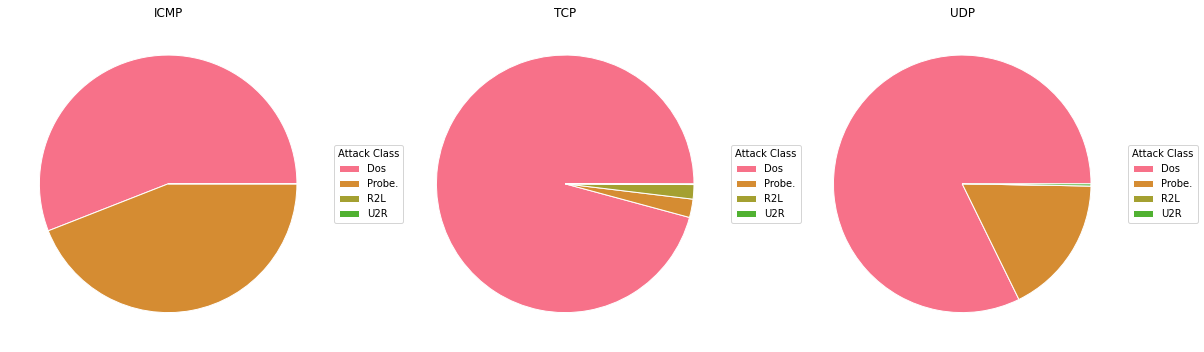

In [29]:
# create the charts
createPieChart([icmp_attack_types, tcp_attack_types, udp_attack_types],
               ['ICMP','TCP', 'UDP'])
plt.show()

In [30]:
icmpSum = attack_protocol_mapping['icmp'].sum()
print("Total ICMP Attack Datapoints: ", icmpSum)
dos_icmp_pct = ((icmp_attack_types['Dos'].sum())/icmpSum)*100
print("DoS percentage of ICMP Attacks: ", round(dos_icmp_pct, 2), "%")
probe_icmp_pct = ((icmp_attack_types['Probe.'].sum())/icmpSum)*100
print("Probe percentage in ICMP Attacks: ", round(probe_icmp_pct, 2), "%")
R2L_icmp_pct = ((icmp_attack_types['R2L'].sum())/icmpSum)*100
print("R2L percentage in ICMP Attacks: ", round(R2L_icmp_pct, 2), "%")
U2R_icmp_pct = ((icmp_attack_types['U2R'].sum())/icmpSum)*100
print("U2R percentage in ICMP Attacks: ", round(U2R_icmp_pct, 2), "%")

Total ICMP Attack Datapoints:  1514
DoS percentage of ICMP Attacks:  55.94 %
Probe percentage in ICMP Attacks:  44.06 %
R2L percentage in ICMP Attacks:  0.0 %
U2R percentage in ICMP Attacks:  0.0 %


In [31]:
tcpSum = attack_protocol_mapping['tcp'].sum()
print("Total TCP Attack Datapoints: ", tcpSum)
dos_tcp_pct = ((tcp_attack_types['Dos'].sum())/tcpSum)*100
print("DoS percentage of TCP Attacks: ", round(dos_tcp_pct, 2), "%")
probe_tcp_pct = ((tcp_attack_types['Probe.'].sum())/tcpSum)*100
print("Probe percentage in TCP Attacks: ", round(probe_tcp_pct, 2), "%")
R2L_tcp_pct = ((tcp_attack_types['R2L'].sum())/tcpSum)*100
print("R2L percentage in TCP Attacks: ", round(R2L_tcp_pct, 2), "%")
U2R_tcp_pct = ((tcp_attack_types['U2R'].sum())/tcpSum)*100
print("U2R percentage in TCP Attacks: ", round(U2R_tcp_pct, 2), "%")

Total TCP Attack Datapoints:  55124
DoS percentage of TCP Attacks:  95.8 %
Probe percentage in TCP Attacks:  2.3 %
R2L percentage in TCP Attacks:  1.81 %
U2R percentage in TCP Attacks:  0.09 %


In [32]:
udpSum = attack_protocol_mapping['udp'].sum()
print("Total UDP Attack Datapoints: ", udpSum)
dos_udp_pct = ((udp_attack_types['Dos'].sum())/udpSum)*100
print("DoS percentage of UDP Attacks: ", round(dos_udp_pct, 2), "%")
probe_udp_pct = ((udp_attack_types['Probe.'].sum())/udpSum)*100
print("Probe percentage in UDP Attacks: ", round(probe_udp_pct, 2), "%")
R2L_udp_pct = ((udp_attack_types['R2L'].sum())/udpSum)*100
print("R2L percentage in UDP Attacks: ", round(R2L_udp_pct, 2), "%")
U2R_udp_pct = ((udp_attack_types['U2R'].sum())/udpSum)*100
print("U2R percentage in UDP Attacks: ", round(U2R_udp_pct, 2), "%")

Total UDP Attack Datapoints:  1116
DoS percentage of UDP Attacks:  82.26 %
Probe percentage in UDP Attacks:  17.47 %
R2L percentage in UDP Attacks:  0.0 %
U2R percentage in UDP Attacks:  0.27 %


# Encoding Categorical Features

In [33]:
# Get column names of values that are of 'Object' datatype
print(list(multi_attack_class.select_dtypes(['object']).columns))

['protocol_type', 'service', 'flag', 'attack_type']


In [34]:
#kdd_encoded = pd.get_dummies(kdd_copy, columns=['protocol_type', 'service', 'flag', 'attack_type'])
#kdd_copy.head()
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
multi_attack_class['attack_encoded'] = labelencoder.fit_transform(multi_attack_class['attack_type'])
multi_attack_class.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_encoded
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,4
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,4
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,4
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,4
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,4


In [35]:
multi_attack_class['attack_type_copy'] = multi_attack_class['attack_type'].copy(deep=True)
multi_attack_class

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_encoded,attack_type_copy
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal,4,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal,4,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,4,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,4,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal,4,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal,4,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal,4,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal,4,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal,4,normal


In [36]:
multi_class_data_preprocessed = pd.get_dummies(multi_attack_class, columns=['protocol_type','service','flag', 'attack_type'])
multi_class_data_preprocessed
print(multi_class_data_preprocessed.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_encoded', 'attack_type_copy', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', '

In [37]:
multi_class_data_preprocessed
print(multi_class_data_preprocessed.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_encoded', 'attack_type_copy', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', '

In [38]:
multi_class_data_preprocessed.to_csv('multi_class_data_preprocessed.csv')
multi_class_data_preprocessed

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_Dos,attack_type_Probe.,attack_type_R2L,attack_type_U2R,attack_type_normal
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
multi_class_data_preprocessed = multi_class_data_preprocessed.rename(columns={'attack_type_Probe.': 'attack_type_Probe', 'attack_type_normal.': 'attack_type_normal'})

In [40]:
print(multi_class_data_preprocessed.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_encoded', 'attack_type_copy', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', '

In [41]:
# check for object datatypes
multi_class_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Columns: 123 entries, duration to attack_type_normal
dtypes: float64(15), int32(1), int64(21), object(1), uint8(85)
memory usage: 54.6+ MB


# Data Visuals

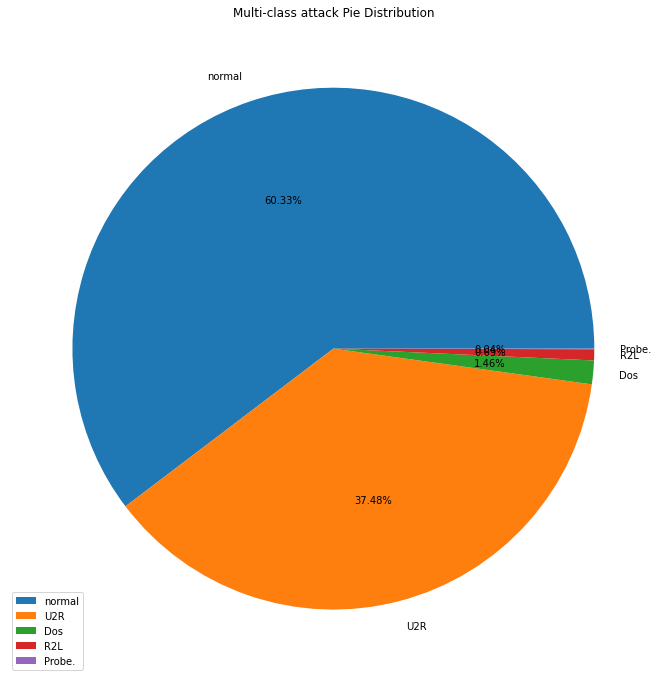

In [42]:
# importing library for plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.pie(multi_attack_class.attack_type.value_counts(),labels=multi_attack_class.attack_type.unique(),autopct='%0.2f%%')
plt.title('Multi-class attack Pie Distribution')
plt.legend()
plt.show()

# Split train and test set

In [43]:
# Split data into features(x = used to predict labels) and labels (y = data we want to predict)
x = multi_class_data_preprocessed.drop(columns=['attack_type_copy','attack_encoded', 'attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L', 'attack_type_U2R', 'attack_type_normal'])
y = multi_class_data_preprocessed.filter(['attack_type_copy','attack_encoded','attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L','attack_type_U2R','attack_type_normal'])

In [44]:
x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   attack_type_copy    145586 non-null  object
 1   attack_encoded      145586 non-null  int32 
 2   attack_type_Dos     145586 non-null  uint8 
 3   attack_type_Probe   145586 non-null  uint8 
 4   attack_type_R2L     145586 non-null  uint8 
 5   attack_type_U2R     145586 non-null  uint8 
 6   attack_type_normal  145586 non-null  uint8 
dtypes: int32(1), object(1), uint8(5)
memory usage: 3.5+ MB


In [46]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit_transform(x.values)
x_scaled = pd.DataFrame(scaler, index=x.index, columns=x.columns)
x_scaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.10785,-0.004293,0.042596,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
1,-0.10785,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
2,-0.10785,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
3,-0.10785,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
4,-0.10785,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.10785,-0.004222,-0.016096,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
494017,-0.10785,-0.004237,-0.009436,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
494018,-0.10785,-0.004281,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
494019,-0.10785,-0.004232,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284


In [47]:
# Separate train and test sets from dataset 
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)
x_train.head()
y_train

,attack_type_copy,attack_encoded,attack_type_Dos,attack_type_Probe,attack_type_R2L,attack_type_U2R,attack_type_normal
29208,normal,4,0,0,0,0,1
493576,normal,4,0,0,0,0,1
53416,normal,4,0,0,0,0,1
19001,normal,4,0,0,0,0,1
359043,Dos,0,1,0,0,0,0
...,...,...,...,...,...,...,...
55297,Dos,0,1,0,0,0,0
354315,Dos,0,1,0,0,0,0
352191,Dos,0,1,0,0,0,0
387122,Dos,0,1,0,0,0,0


In [48]:
x_train.shape, x_test.shape

((116468, 116), (29118, 116))

In [49]:
y_train.shape, y_test.shape

((116468, 7), (29118, 7))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# # Feature Scaling
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)


In [51]:
# Full features train and test set
x_train_full_features = x_train.copy(deep=True)
x_test_full_features = x_test.copy(deep=True)
x_train_full_features.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
29208,-0.107850,-0.004279,-0.025256,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
493576,-0.107850,-0.004248,-0.003713,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
53416,-0.103766,-0.003946,-0.041536,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
19001,-0.107850,-0.004234,-0.003318,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
359043,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284


# Feature Selection Analysis

In [52]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information(Values are between 0 and 1)
# 0 = Feature is independent from the target
# 1 = Feature dependency on the target is high (most important feature)
mutual_information = mutual_info_classif(x_train, y_train['attack_type_copy'])
mutual_information

array([4.11050823e-02, 5.96931558e-01, 4.69893085e-01, 1.36331803e-03,
       1.06064556e-02, 1.51654141e-03, 2.15537679e-02, 0.00000000e+00,
       3.60441376e-01, 8.04949430e-03, 2.32821106e-03, 0.00000000e+00,
       2.37817152e-03, 9.73090811e-04, 3.50713445e-04, 1.33336300e-03,
       1.00374569e-02, 5.68208939e-01, 1.14360524e-01, 4.22054712e-01,
       4.05354118e-01, 5.08564014e-02, 3.17026265e-02, 5.79692059e-01,
       5.89273995e-01, 1.27314449e-01, 2.41676751e-01, 4.86583677e-01,
       4.92490938e-01, 5.00138067e-01, 2.50767779e-01, 2.43407393e-01,
       4.25181122e-01, 4.07879567e-01, 5.52049177e-02, 5.91560017e-02,
       1.55636714e-02, 2.72468406e-02, 2.59958886e-02, 0.00000000e+00,
       4.01330381e-03, 1.68964789e-03, 7.88437674e-04, 2.39831063e-03,
       9.31189925e-04, 1.59063446e-04, 8.93065122e-04, 1.17730882e-03,
       0.00000000e+00, 0.00000000e+00, 2.13166058e-02, 1.04476564e-03,
       1.67650103e-02, 3.14921602e-03, 1.13808235e-03, 0.00000000e+00,
      

In [53]:
# Sort mutual information values according to each feature from highest to lowest
mutual_information = pd.Series(mutual_information)
mutual_information.index = x_train.columns
mutual_information.sort_values(ascending=False)

src_bytes                 0.596932
diff_srv_rate             0.589274
same_srv_rate             0.579692
count                     0.568209
dst_host_diff_srv_rate    0.500138
                            ...   
service_domain            0.000000
service_discard           0.000000
service_whois             0.000000
service_netbios_dgm       0.000000
service_exec              0.000000
Length: 116, dtype: float64

<AxesSubplot:>

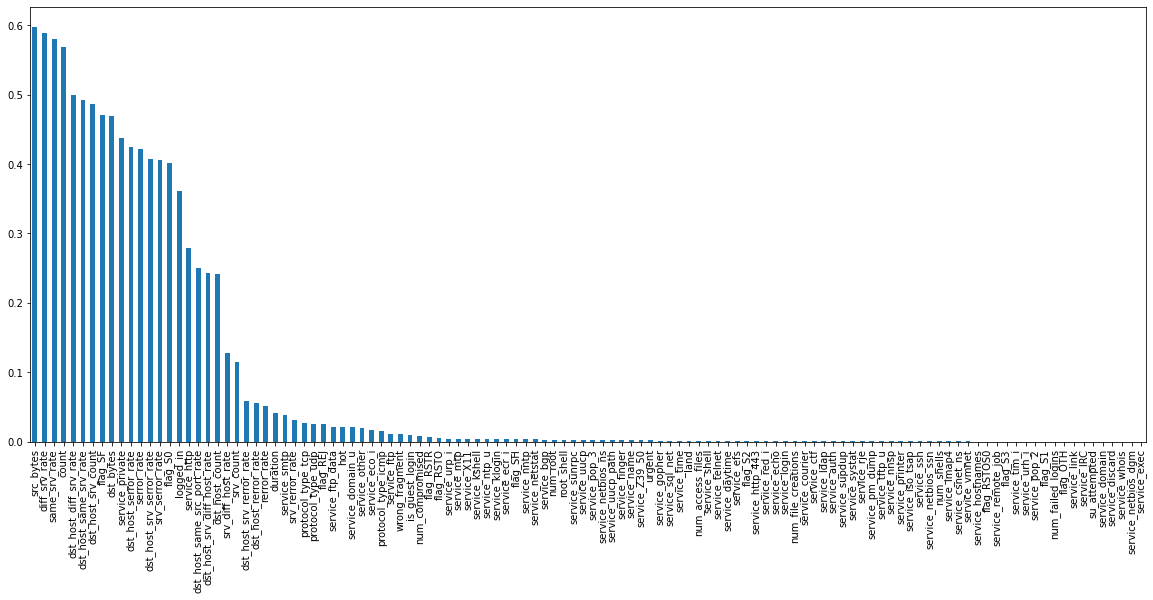

In [54]:
# Plot mutual information values per feature
mutual_information.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [55]:
# Import SelectKBest library to use for feature selection
from sklearn.feature_selection import SelectKBest
x_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
29208,-0.107850,-0.004279,-0.025256,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
493576,-0.107850,-0.004248,-0.003713,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
53416,-0.103766,-0.003946,-0.041536,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
19001,-0.107850,-0.004234,-0.003318,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
359043,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
354315,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
352191,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
387122,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284


In [56]:
# Apply SelectKBest to extract top 20 important features
select_top_20_features = SelectKBest(mutual_info_classif, k = 20)
select_top_20_features.fit(x_train, y_train['attack_type_copy'])
twenty_features = x_train.columns[select_top_20_features.get_support()]

In [57]:
# Convert to list
twenty_features.tolist()

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']

In [58]:
x_train = x_train[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']]

In [59]:
x_train.head()

,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,service_private,flag_S0,flag_SF
29208,-0.004279,-0.025256,1.017168,-0.591870,-0.643361,-0.642799,0.771735,-0.337021,-1.679836,1.090232,0.979272,-0.417555,-0.094661,0.181301,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
493576,-0.004248,-0.003713,1.017168,-0.671602,-0.643361,-0.642799,0.771735,-0.337021,-1.760565,1.090232,0.979272,-0.417555,0.195648,0.512375,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
53416,-0.003946,-0.041536,1.017168,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,-0.489094,0.340544,0.409390,-0.213502,-0.343497,-0.149773,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242
19001,-0.004234,-0.003318,1.017168,-0.382572,-0.643361,-0.642799,0.771735,-0.337021,-0.640460,1.090232,0.979272,-0.417555,-0.343497,0.181301,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
359043,-0.004392,-0.047028,-0.983122,0.384852,1.564627,1.561957,-1.220238,0.161338,0.742012,-0.975768,-1.059152,0.058570,-0.384970,-0.315310,1.565565,1.563630,-0.861903,1.402744,1.563183,-1.226629


In [60]:
x_test = x_test[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']]

In [61]:
x_test.head()

,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,service_private,flag_S0,flag_SF
353752,-0.004392,-0.047028,-0.983122,0.604117,1.564627,1.561957,-1.354528,0.161338,0.742012,-1.036789,-1.124908,-0.009448,-0.384970,-0.315310,1.565565,1.563630,-0.861903,1.402744,1.563183,-1.226629
33623,-0.004214,-0.040352,1.017168,-0.651669,-0.643361,-0.642799,0.771735,-0.337021,0.742012,1.090232,0.979272,-0.417555,-0.384970,-0.315310,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
139040,-0.004251,-0.042342,1.017168,-0.641702,-0.643361,-0.642799,0.771735,-0.337021,-0.024906,1.090232,0.979272,-0.417555,-0.343497,-0.149773,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
17647,-0.004253,-0.039579,1.017168,-0.631736,-0.643361,-0.642799,0.771735,-0.337021,0.742012,1.090232,0.979272,-0.417555,-0.384970,-0.315310,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
6859,-0.003810,-0.042457,1.017168,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,0.742012,0.602063,0.497064,-0.281520,-0.384970,-0.315310,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242


In [64]:
y_train = y_train[['attack_type_R2L', 'attack_type_U2R', 'attack_type_Dos','attack_type_normal','attack_type_Probe']]
y_train

,attack_type_R2L,attack_type_U2R,attack_type_Dos,attack_type_normal,attack_type_Probe
29208,0,0,0,1,0
493576,0,0,0,1,0
53416,0,0,0,1,0
19001,0,0,0,1,0
359043,0,0,1,0,0
...,...,...,...,...,...
55297,0,0,1,0,0
354315,0,0,1,0,0
352191,0,0,1,0,0
387122,0,0,1,0,0


In [65]:
y_train.columns

Index(['attack_type_R2L', 'attack_type_U2R', 'attack_type_Dos',
       'attack_type_normal', 'attack_type_Probe'],
      dtype='object')

In [66]:
y_test = y_test[['attack_type_R2L', 'attack_type_U2R', 'attack_type_Dos','attack_type_normal','attack_type_Probe']]
y_test

,attack_type_R2L,attack_type_U2R,attack_type_Dos,attack_type_normal,attack_type_Probe
353752,0,0,1,0,0
33623,0,0,0,1,0
139040,0,0,0,1,0
17647,0,0,0,1,0
6859,0,0,0,1,0
...,...,...,...,...,...
86565,0,0,1,0,0
77160,1,0,0,0,0
232,0,0,0,1,0
32918,0,0,0,1,0


In [67]:
y_test.columns

Index(['attack_type_R2L', 'attack_type_U2R', 'attack_type_Dos',
       'attack_type_normal', 'attack_type_Probe'],
      dtype='object')

In [68]:
x_train.shape


(116468, 20)

In [69]:
x_test.shape

(29118, 20)

In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116468 entries, 29208 to 57270
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    116468 non-null  float64
 1   dst_bytes                    116468 non-null  float64
 2   logged_in                    116468 non-null  float64
 3   count                        116468 non-null  float64
 4   serror_rate                  116468 non-null  float64
 5   srv_serror_rate              116468 non-null  float64
 6   same_srv_rate                116468 non-null  float64
 7   diff_srv_rate                116468 non-null  float64
 8   dst_host_count               116468 non-null  float64
 9   dst_host_srv_count           116468 non-null  float64
 10  dst_host_same_srv_rate       116468 non-null  float64
 11  dst_host_diff_srv_rate       116468 non-null  float64
 12  dst_host_same_src_port_rate  116468 non-null  float64
 

In [71]:
y_train.shape

(116468, 5)

In [72]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116468 entries, 29208 to 57270
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   attack_type_R2L     116468 non-null  uint8
 1   attack_type_U2R     116468 non-null  uint8
 2   attack_type_Dos     116468 non-null  uint8
 3   attack_type_normal  116468 non-null  uint8
 4   attack_type_Probe   116468 non-null  uint8
dtypes: uint8(5)
memory usage: 1.4 MB


# Model 1: Top 20 Features

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.5,
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
1820/1820 - 3s - loss: 0.1351 - val_loss: 0.0678
Epoch 2/1000
1820/1820 - 2s - loss: 0.0567 - val_loss: 0.0473
Epoch 3/1000
1820/1820 - 2s - loss: 0.0472 - val_loss: 0.0451
Epoch 4/1000
1820/1820 - 3s - loss: 0.0416 - val_loss: 0.0397
Epoch 5/1000
1820/1820 - 2s - loss: 0.0374 - val_loss: 0.0351
Epoch 6/1000
1820/1820 - 2s - loss: 0.0333 - val_loss: 0.0317
Epoch 7/1000
1820/1820 - 2s - loss: 0.0316 - val_loss: 0.0315
Epoch 8/1000
1820/1820 - 2s - loss: 0.0291 - val_loss: 0.0281
Epoch 9/1000
1820/1820 - 2s - loss: 0.0271 - val_loss: 0.0322
Epoch 10/1000
1820/1820 - 2s - loss: 0.0245 - val_loss: 0.0256
Epoch 11/1000
1820/1820 - 2s - loss: 0.0223 - val_loss: 0.0237
Epoch 12/1000
1820/1820 - 2s - loss: 0.0218 - val_loss: 0.0247
Epoch 13/1000
1820/1820 - 3s - loss: 0.0203 - val_loss: 0.0218
Epoch 14/1000
1820/1820 - 2s - loss: 0.0196 - val_loss: 0.0236
Epoch 15/1000
1820/1820 - 2s - loss: 0.0197 - val_loss: 0.0194
Epoch 16/1000
1820/1820 - 2s - loss: 0.0186 - val_loss: 0.0228
E

In [74]:
y_test = y_test.filter(['attack_type_R2L', 'attack_type_U2R', 'attack_type_Dos','attack_type_normal','attack_type_Probe'])
y_test

,attack_type_R2L,attack_type_U2R,attack_type_Dos,attack_type_normal,attack_type_Probe
353752,0,0,1,0,0
33623,0,0,0,1,0
139040,0,0,0,1,0
17647,0,0,0,1,0
6859,0,0,0,1,0
...,...,...,...,...,...
86565,0,0,1,0,0
77160,1,0,0,0,0
232,0,0,0,1,0
32918,0,0,0,1,0


In [75]:
x_test

,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,service_private,flag_S0,flag_SF
353752,-0.004392,-0.047028,-0.983122,0.604117,1.564627,1.561957,-1.354528,0.161338,0.742012,-1.036789,-1.124908,-0.009448,-0.384970,-0.315310,1.565565,1.563630,-0.861903,1.402744,1.563183,-1.226629
33623,-0.004214,-0.040352,1.017168,-0.651669,-0.643361,-0.642799,0.771735,-0.337021,0.742012,1.090232,0.979272,-0.417555,-0.384970,-0.315310,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
139040,-0.004251,-0.042342,1.017168,-0.641702,-0.643361,-0.642799,0.771735,-0.337021,-0.024906,1.090232,0.979272,-0.417555,-0.343497,-0.149773,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
17647,-0.004253,-0.039579,1.017168,-0.631736,-0.643361,-0.642799,0.771735,-0.337021,0.742012,1.090232,0.979272,-0.417555,-0.384970,-0.315310,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
6859,-0.003810,-0.042457,1.017168,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,0.742012,0.602063,0.497064,-0.281520,-0.384970,-0.315310,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86565,-0.004377,-0.047028,-0.983122,-0.522104,-0.643361,-0.642799,0.771735,-0.337021,0.742012,-0.940899,-1.015315,-0.349537,-0.011716,-0.315310,-0.644428,-0.641705,-0.861903,1.402744,-0.639720,0.815242
77160,-0.004392,84.646532,-0.983122,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,-1.659654,-0.984485,0.979272,-0.417555,3.762299,-0.315310,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242
232,-0.004230,-0.023759,1.017168,-0.721435,-0.643361,-0.642799,0.771735,-0.337021,-1.367014,-0.731684,0.979272,-0.417555,-0.302025,-0.315310,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
32918,-0.004205,-0.039546,1.017168,-0.721435,-0.643361,-0.642799,0.771735,-0.337021,0.742012,1.090232,0.979272,-0.417555,-0.384970,-0.315310,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242


In [76]:
from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

Validation score: 0.9938525997664674


array([2, 3, 3, ..., 3, 3, 3], dtype=int64)

In [77]:
print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

216
8
10888
17583
423


In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [79]:
cm = confusion_matrix(y_eval, pred)

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['r2l','u2r','dos','normal','u2r'])

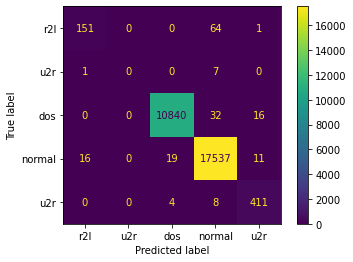

In [83]:
disp.plot()

# Model 2: Using All Features

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train_full_features,y_train,validation_split=0.5,
          callbacks=[monitor],verbose=2,epochs=1000)

In [ ]:
from sklearn import metrics
pred = model.predict(x_test_full_features)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

In [ ]:
print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

In [ ]:
cm = confusion_matrix(y_eval, pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

In [ ]:
disp.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.1,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train_full_features,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test_full_features)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

# Increasing Layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(25, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
model = Sequential() # Initialize Model
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu')) #Input Layer
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
prediction = model.predict(x_test)
prediction = np.argmax(prediction,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(y_eval, prediction)
print("Validation score: {}".format(validation_score))


In [ ]:
prediction

In [ ]:
print("R2L: ", (y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (y_test['attack_type_Probe'] == 1).sum())

In [ ]:
neural_network_cm = confusion_matrix(y_eval, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['dos','probe','r2l','u2r','normal'])
display.plot()

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
# Graphs

# New train and test set: Neural Network

In [84]:
x_scaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.10785,-0.004293,0.042596,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
1,-0.10785,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
2,-0.10785,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
3,-0.10785,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
4,-0.10785,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.10785,-0.004222,-0.016096,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
494017,-0.10785,-0.004237,-0.009436,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
494018,-0.10785,-0.004281,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
494019,-0.10785,-0.004232,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.63972,-0.019791,-0.01284,-0.008288,0.815242,-0.015284


In [85]:
nn_x_train, nn_x_test, nn_y_train, nn_y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [86]:
nn_x_train_20 = nn_x_train[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']]
nn_x_train_20

,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,service_http,service_private,flag_S0,flag_SF
83046,-0.004376,-0.047028,-0.983122,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,-0.509276,0.009287,0.979272,-0.417555,3.762299,-0.315310,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242
16840,-0.004215,0.009098,1.017168,-0.611803,-0.643361,-0.642799,0.771735,-0.337021,-1.326650,1.090232,0.979272,-0.417555,-0.302025,0.015764,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,0.815242
107979,-0.004369,-0.046338,-0.983122,-0.661635,-0.643361,-0.642799,0.771735,-0.337021,0.742012,0.942038,0.825842,-0.349537,-0.343497,-0.315310,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242
148851,-0.004392,-0.047028,-0.983122,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,-1.811020,1.003059,0.979272,-0.417555,1.688665,4.485263,-0.644428,-0.641705,1.160223,-0.712888,-0.639720,-1.226629
348895,-0.004374,-0.047028,-0.983122,-0.731401,-0.643361,-0.642799,0.771735,-0.337021,-1.821111,-1.123962,0.979272,-0.417555,3.762299,-0.315310,-0.644428,-0.641705,-0.861903,-0.712888,-0.639720,0.815242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371372,-0.004377,-0.047028,-0.983122,0.195488,-0.643361,-0.642799,0.771735,-0.337021,0.742012,-0.313253,-0.401596,-0.349537,1.149520,-0.315310,-0.644428,-0.641705,-0.861903,1.402744,-0.639720,0.815242
393455,-0.004392,-0.047028,-0.983122,1.929668,1.564627,1.561957,-1.444055,0.078278,0.742012,-1.106528,-1.190663,-0.077466,-0.384970,-0.315310,1.565565,1.563630,-0.861903,1.402744,1.563183,-1.226629
362034,-0.004392,-0.047028,-0.983122,-0.412472,1.498387,1.561957,-0.794985,0.659697,0.742012,-1.036789,-1.124908,0.058570,-0.343497,-0.315310,1.565565,1.563630,-0.861903,-0.712888,1.563183,-1.226629
466449,-0.004392,-0.047028,-0.983122,0.404786,-0.643361,-0.642799,-1.175474,0.161338,0.742012,-0.993203,-1.081071,0.058570,-0.384970,-0.315310,-0.644428,-0.641705,-0.861903,1.402744,-0.639720,-1.226629


In [87]:
nn_x_test_20 = nn_x_test[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']]
nn_x_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
387127,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
465124,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,2.982571,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
464688,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,2.982571,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
63522,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
67639,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61104,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,1.563183,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284
17871,-0.107850,-0.004275,0.244916,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
77689,-0.041682,-0.004275,-0.044183,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,-0.335281,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,0.815242,-0.015284
346025,-0.107850,-0.004392,-0.047028,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,-0.983122,-0.007905,...,2.982571,-0.062639,-0.008693,-0.054109,-0.639720,-0.019791,-0.01284,-0.008288,-1.226629,-0.015284


In [123]:
nn_y_train = nn_y_train[['attack_type_R2L', 'attack_type_U2R','attack_type_Dos','attack_type_normal','attack_type_Probe']]
nn_y_test = nn_y_test[['attack_type_R2L', 'attack_type_U2R','attack_type_Dos','attack_type_normal','attack_type_Probe']]
nn_y_test

,attack_type_R2L,attack_type_U2R,attack_type_Dos,attack_type_normal,attack_type_Probe
387127,0,0,1,0,0
465124,0,0,1,0,0
464688,0,0,1,0,0
63522,0,0,1,0,0
67639,0,0,1,0,0
...,...,...,...,...,...
61104,0,0,1,0,0
17871,0,0,0,1,0
77689,0,0,0,1,0
346025,0,0,0,1,0


In [124]:
nn_y_train.shape, nn_y_test.shape

((101910, 5), (43676, 5))

# Neural Network: 20 features Run #1 = 0.994 , valid_split = 0.25, dense 30

In [125]:
from sklearn import metrics
import numpy as np
nn_model = Sequential() # Initialize Model
nn_model.add(Dense(20, input_dim=nn_x_train_20.shape[1], activation='relu')) #Input Layer
nn_model.add(Dense(100, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(50, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(25, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
nn_model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
nn_model.fit(nn_x_train_20,nn_y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

nn_prediction_20 = nn_model.predict(nn_x_test_20)
nn_prediction_20 = np.argmax(nn_prediction_20,axis=1)
nn_y_eval_20 = np.argmax(nn_y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(nn_y_eval_20, nn_prediction_20)
print("Validation score: {}".format(validation_score))


Epoch 1/1000
2707/2707 - 3s - loss: 0.0802 - val_loss: 0.0465
Epoch 2/1000
2707/2707 - 3s - loss: 0.0406 - val_loss: 0.0425
Epoch 3/1000
2707/2707 - 3s - loss: 0.0321 - val_loss: 0.0271
Epoch 4/1000
2707/2707 - 3s - loss: 0.0242 - val_loss: 0.0259
Epoch 5/1000
2707/2707 - 3s - loss: 0.0238 - val_loss: 0.0231
Epoch 6/1000
2707/2707 - 3s - loss: 0.0201 - val_loss: 0.0214
Epoch 7/1000
2707/2707 - 3s - loss: 0.0172 - val_loss: 0.0209
Epoch 8/1000
2707/2707 - 3s - loss: 0.0174 - val_loss: 0.0201
Epoch 9/1000
2707/2707 - 3s - loss: 0.0158 - val_loss: 0.0211
Epoch 10/1000
2707/2707 - 3s - loss: 0.0152 - val_loss: 0.0206
Epoch 11/1000
2707/2707 - 3s - loss: 0.0143 - val_loss: 0.0189
Epoch 12/1000
2707/2707 - 3s - loss: 0.0153 - val_loss: 0.0218
Epoch 13/1000
2707/2707 - 3s - loss: 0.0276 - val_loss: 0.0215
Epoch 14/1000
2707/2707 - 3s - loss: 0.0128 - val_loss: 0.0193
Epoch 15/1000
2707/2707 - 3s - loss: 0.0126 - val_loss: 0.0182
Epoch 16/1000
2707/2707 - 3s - loss: 0.0126 - val_loss: 0.0256
R

In [126]:
nn_prediction_20

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [127]:
print("R2L: ", (nn_y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (nn_y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (nn_y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (nn_y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (nn_y_test['attack_type_Probe'] == 1).sum())

R2L:  279
U2R:  11
Dos:  16306
Normal:  26431
Probe:  649


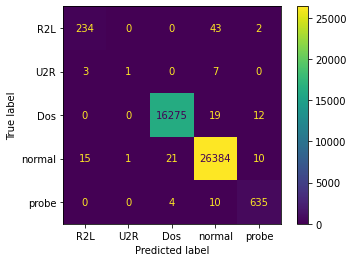

In [128]:
neural_network_cm = confusion_matrix(nn_y_eval_20, nn_prediction_20)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['R2L','U2R','Dos','normal','probe'])
display.plot()

# Neural Network: 20 features Run #2 = 0.9964

Epoch 1/1000
2389/2389 - 3s - loss: 0.3343 - val_loss: 0.1635
Epoch 2/1000
2389/2389 - 3s - loss: 0.1493 - val_loss: 0.1257
Epoch 3/1000
2389/2389 - 4s - loss: 0.1095 - val_loss: 0.1048
Epoch 4/1000
2389/2389 - 3s - loss: 0.0899 - val_loss: 0.0900
Epoch 5/1000
2389/2389 - 4s - loss: 0.0794 - val_loss: 0.0794
Epoch 6/1000
2389/2389 - 4s - loss: 0.0745 - val_loss: 0.0743
Epoch 7/1000
2389/2389 - 3s - loss: 0.0680 - val_loss: 0.0708
Epoch 8/1000
2389/2389 - 4s - loss: 0.0657 - val_loss: 0.0729
Epoch 9/1000
2389/2389 - 5s - loss: 0.0633 - val_loss: 0.0668
Epoch 10/1000
2389/2389 - 5s - loss: 0.0618 - val_loss: 0.0660
Epoch 11/1000
2389/2389 - 4s - loss: 0.0589 - val_loss: 0.0640
Epoch 12/1000
2389/2389 - 3s - loss: 0.0558 - val_loss: 0.0623
Epoch 13/1000
2389/2389 - 3s - loss: 0.0567 - val_loss: 0.0615
Epoch 14/1000
2389/2389 - 3s - loss: 0.0506 - val_loss: 0.0589
Epoch 15/1000
2389/2389 - 3s - loss: 0.0485 - val_loss: 0.0565
Epoch 16/1000
2389/2389 - 3s - loss: 0.0455 - val_loss: 0.0527
E

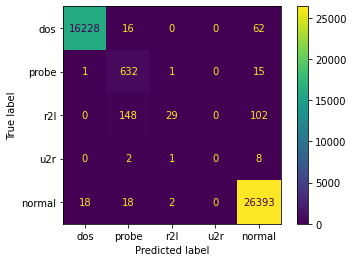

In [94]:
nn_model = Sequential() # Initialize Model
nn_model.add(Dense(20, input_dim=nn_x_train_20.shape[1], activation='relu')) #Input Layer
nn_model.add(Dense(50, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(10, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(1, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
nn_model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
nn_model.fit(nn_x_train_20,nn_y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

nn_prediction_20 = nn_model.predict(nn_x_test_20)
nn_prediction_20 = np.argmax(nn_prediction_20,axis=1)
nn_y_eval_20 = np.argmax(nn_y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(nn_y_eval_20, nn_prediction_20)
print("Validation score: {}".format(validation_score))
nn_prediction_20
print("R2L: ", (nn_y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (nn_y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (nn_y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (nn_y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (nn_y_test['attack_type_Probe'] == 1).sum())
neural_network_cm = confusion_matrix(nn_y_eval_20, nn_prediction_20)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['R2L','U2R','Dos','normal','probe'])
display.plot()

# Neural Network: 20 features Run #3 = 0.995 - 3 U2R

Epoch 1/1000
2389/2389 - 3s - loss: 0.0824 - val_loss: 0.0486
Epoch 2/1000
2389/2389 - 3s - loss: 0.0412 - val_loss: 0.0391
Epoch 3/1000
2389/2389 - 3s - loss: 0.0309 - val_loss: 0.0345
Epoch 4/1000
2389/2389 - 3s - loss: 0.0276 - val_loss: 0.0323
Epoch 5/1000
2389/2389 - 3s - loss: 0.0223 - val_loss: 0.0242
Epoch 6/1000
2389/2389 - 3s - loss: 0.0200 - val_loss: 0.0232
Epoch 7/1000
2389/2389 - 3s - loss: 0.0194 - val_loss: 0.0236
Epoch 8/1000
2389/2389 - 3s - loss: 0.0175 - val_loss: 0.0233
Epoch 9/1000
2389/2389 - 3s - loss: 0.0171 - val_loss: 0.0221
Epoch 10/1000
2389/2389 - 3s - loss: 0.0180 - val_loss: 0.0228
Epoch 11/1000
2389/2389 - 3s - loss: 0.0166 - val_loss: 0.0273
Epoch 12/1000
2389/2389 - 3s - loss: 0.0141 - val_loss: 0.0206
Epoch 13/1000
2389/2389 - 3s - loss: 0.0140 - val_loss: 0.0241
Epoch 14/1000
2389/2389 - 3s - loss: 0.0126 - val_loss: 0.0246
Epoch 15/1000
2389/2389 - 3s - loss: 0.0134 - val_loss: 0.0208
Epoch 16/1000
2389/2389 - 3s - loss: 0.0131 - val_loss: 0.0195
E

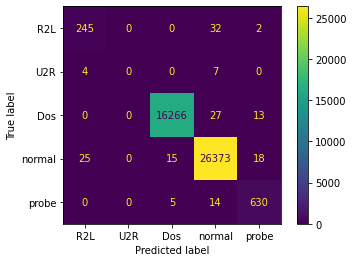

In [129]:
nn_model = Sequential() # Initialize Model
nn_model.add(Dense(20, input_dim=nn_x_train_20.shape[1], activation='relu')) #Input Layer
nn_model.add(Dense(100, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(50, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(15, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
nn_model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
nn_model.fit(nn_x_train_20,nn_y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

nn_prediction_20 = nn_model.predict(nn_x_test_20)
nn_prediction_20 = np.argmax(nn_prediction_20,axis=1)
nn_y_eval_20 = np.argmax(nn_y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(nn_y_eval_20, nn_prediction_20)
print("Validation score: {}".format(validation_score))
nn_prediction_20
print("R2L: ", (nn_y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (nn_y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (nn_y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (nn_y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (nn_y_test['attack_type_Probe'] == 1).sum())
neural_network_cm = confusion_matrix(nn_y_eval_20, nn_prediction_20)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['R2L','U2R','Dos','normal','probe'])
display.plot()

# Neural Network: 20 features Run #4

Epoch 1/1000
2389/2389 - 2s - loss: 0.1172 - val_loss: 0.0611
Epoch 2/1000
2389/2389 - 2s - loss: 0.0473 - val_loss: 0.0471
Epoch 3/1000
2389/2389 - 2s - loss: 0.0380 - val_loss: 0.0463
Epoch 4/1000
2389/2389 - 2s - loss: 0.0325 - val_loss: 0.0362
Epoch 5/1000
2389/2389 - 2s - loss: 0.0284 - val_loss: 0.0322
Epoch 6/1000
2389/2389 - 3s - loss: 0.0245 - val_loss: 0.0329
Epoch 7/1000
2389/2389 - 3s - loss: 0.0230 - val_loss: 0.0277
Epoch 8/1000
2389/2389 - 3s - loss: 0.0206 - val_loss: 0.0248
Epoch 9/1000
2389/2389 - 3s - loss: 0.0189 - val_loss: 0.0330
Epoch 10/1000
2389/2389 - 3s - loss: 0.0182 - val_loss: 0.0270
Epoch 11/1000
2389/2389 - 3s - loss: 0.0170 - val_loss: 0.0224
Epoch 12/1000
2389/2389 - 3s - loss: 0.0165 - val_loss: 0.0215
Epoch 13/1000
2389/2389 - 3s - loss: 0.0158 - val_loss: 0.0233
Epoch 14/1000
2389/2389 - 3s - loss: 0.0151 - val_loss: 0.0212
Epoch 15/1000
2389/2389 - 3s - loss: 0.0148 - val_loss: 0.0216
Epoch 16/1000
2389/2389 - 3s - loss: 0.0141 - val_loss: 0.0211
E

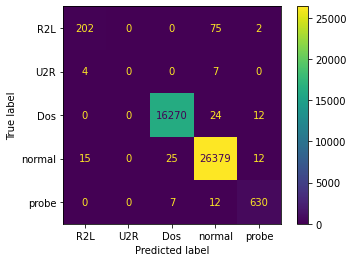

In [130]:
nn_model = Sequential() # Initialize Model
nn_model.add(Dense(20, input_dim=nn_x_train_20.shape[1], activation='relu')) #Input Layer
#nn_model.add(Dense(100, input_dim=nn_x_train.shape[1], activation='relu'))
nn_model.add(Dense(30, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(15, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
nn_model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
nn_model.fit(nn_x_train_20,nn_y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

nn_prediction_20 = nn_model.predict(nn_x_test_20)
nn_prediction_20 = np.argmax(nn_prediction_20,axis=1)
nn_y_eval_20 = np.argmax(nn_y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(nn_y_eval_20, nn_prediction_20)
print("Validation score: {}".format(validation_score))
nn_prediction_20
print("R2L: ", (nn_y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (nn_y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (nn_y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (nn_y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (nn_y_test['attack_type_Probe'] == 1).sum())
neural_network_cm = confusion_matrix(nn_y_eval_20, nn_prediction_20)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['R2L','U2R','Dos','normal','probe'])
display.plot()

Epoch 1/1000
2389/2389 - 3s - loss: 0.0791 - val_loss: 0.0492
Epoch 2/1000
2389/2389 - 3s - loss: 0.0389 - val_loss: 0.0361
Epoch 3/1000
2389/2389 - 3s - loss: 0.0305 - val_loss: 0.0367
Epoch 4/1000
2389/2389 - 3s - loss: 0.0231 - val_loss: 0.0270
Epoch 5/1000
2389/2389 - 3s - loss: 0.0204 - val_loss: 0.0240
Epoch 6/1000
2389/2389 - 3s - loss: 0.0204 - val_loss: 0.0243
Epoch 7/1000
2389/2389 - 3s - loss: 0.0207 - val_loss: 0.0263
Epoch 8/1000
2389/2389 - 3s - loss: 0.0174 - val_loss: 0.0223
Epoch 9/1000
2389/2389 - 3s - loss: 0.0173 - val_loss: 0.0222
Epoch 10/1000
2389/2389 - 3s - loss: 0.0153 - val_loss: 0.0223
Epoch 11/1000
2389/2389 - 3s - loss: 0.0156 - val_loss: 0.0236
Epoch 12/1000
2389/2389 - 3s - loss: 0.0148 - val_loss: 0.0210
Epoch 13/1000
2389/2389 - 3s - loss: 0.0154 - val_loss: 0.0197
Epoch 14/1000
2389/2389 - 3s - loss: 0.0131 - val_loss: 0.0189
Epoch 15/1000
2389/2389 - 3s - loss: 0.0122 - val_loss: 0.0242
Epoch 16/1000
2389/2389 - 3s - loss: 0.0131 - val_loss: 0.0193
E

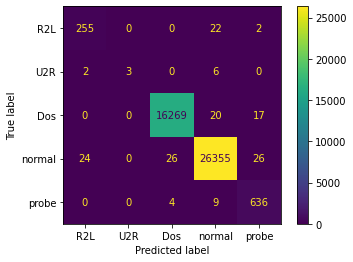

In [136]:
nn_model = Sequential() # Initialize Model
nn_model.add(Dense(20, input_dim=nn_x_train_20.shape[1], activation='relu')) #Input Layer
nn_model.add(Dense(100, input_dim=nn_x_train.shape[1], activation='relu'))
nn_model.add(Dense(50, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(20, input_dim=nn_x_train_20.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
nn_model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
nn_model.fit(nn_x_train_20,nn_y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

nn_prediction_20 = nn_model.predict(nn_x_test_20)
nn_prediction_20 = np.argmax(nn_prediction_20,axis=1)
nn_y_eval_20 = np.argmax(nn_y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(nn_y_eval_20, nn_prediction_20)
print("Validation score: {}".format(validation_score))
nn_prediction_20
print("R2L: ", (nn_y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (nn_y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (nn_y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (nn_y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (nn_y_test['attack_type_Probe'] == 1).sum())
neural_network_cm = confusion_matrix(nn_y_eval_20, nn_prediction_20)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['R2L','U2R','Dos','normal','probe'])
display.plot()

In [137]:
from sklearn.metrics import classification_report
#nn_prediction_20
print(classification_report(nn_y_test, nn_prediction_20, digits=4))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

# Neural Network: All features Run #1 = 0.9983

In [ ]:
nn_x_train

In [ ]:
nn_model = Sequential() # Initialize Model
nn_model.add(Dense(20, input_dim=nn_x_train.shape[1], activation='relu')) #Input Layer
#nn_model.add(Dense(100, input_dim=nn_x_train.shape[1], activation='relu'))
nn_model.add(Dense(50, input_dim=nn_x_train.shape[1], activation='relu'))
nn_model.add(Dense(20, input_dim=nn_x_train.shape[1], activation='relu'))
nn_model.add(Dense(5, activation='softmax')) # Output Layer using softmax activation

# Loss function
nn_model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
nn_model.fit(nn_x_train,nn_y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

nn_prediction = nn_model.predict(nn_x_test)
nn_prediction = np.argmax(nn_prediction,axis=1)
nn_y_eval = np.argmax(nn_y_test.to_numpy(),axis=1)
validation_score = metrics.accuracy_score(nn_y_eval, nn_prediction)
print("Validation score: {}".format(validation_score))
nn_prediction
print("R2L: ", (nn_y_test['attack_type_R2L'] == 1).sum())
print("U2R: ", (nn_y_test['attack_type_U2R'] == 1).sum())
print("Dos: ", (nn_y_test['attack_type_Dos'] == 1).sum())
print("Normal: ", (nn_y_test['attack_type_normal'] == 1).sum())
print("Probe: ", (nn_y_test['attack_type_Probe'] == 1).sum())
neural_network_cm = confusion_matrix(nn_y_eval, nn_prediction)
display = ConfusionMatrixDisplay(confusion_matrix=neural_network_cm, display_labels=['dos','probe','r2l','u2r','normal'])
display.plot()